In [2]:
%%capture
!pip install tensorflow

### Concept of Perceptron 
![Perceptron](image_resource/Perceptron.png)

$$ \begin{matrix}
\hat{Y} = g\left(w_0 + \sum\limits_{i=1}^{m} x_i w_i\right) \\ \\
 \implies \hat{Y} = g\left(W^T X \right)
 \end{matrix} \;\;\;
\text{Where} \;\;\; W = \begin{bmatrix}
w_0\\ w_1\\ \vdots \\ x_m
\end{bmatrix}\;\;\;


\text{and} \;\;\;\
X = \begin{bmatrix}
1\\ x_1\\ \vdots \\ x_m
\end{bmatrix}
$$

g is known as activation function <br>
g may be sigmoid , hyperbolic(tanh), or Rectified Linear Unit 





#### Common Activation Function 

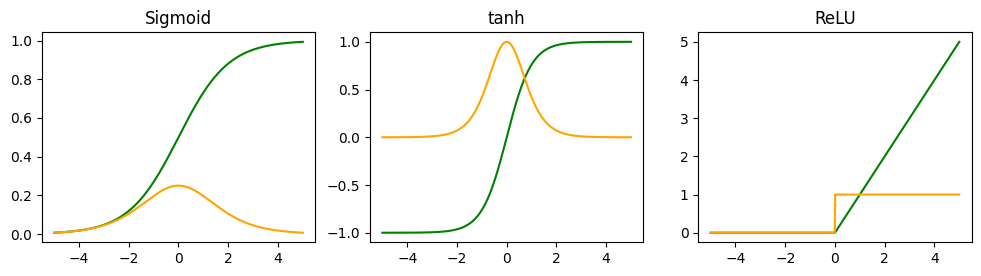

In [3]:
# Module Import 
import tensorflow as tf # array 
from tensorflow.math import sigmoid ,tanh 
from tensorflow.nn import relu
from matplotlib import pyplot as plt # ploting 
a = tf.Variable(tf.linspace(-5,5,500))
# Plot Configuration 
plt.figure(figsize=(12,6))
ax1 = plt.subplot(231)
ax1.set_title("Sigmoid")
ax2 = plt.subplot(232)
ax2.set_title("tanh")
ax3 = plt.subplot(233)
ax3.set_title("ReLU")
# Calculating g(x) and g'(x)
with tf.GradientTape(persistent=True) as tape:
    sigmoid_function_points = sigmoid(a)
    tanh_function_points = tanh(a)
    relu_function_points = relu(a)
# Derivative Calculation from tape
sigmoid_prime_points = tape.gradient(sigmoid_function_points,a)
tanh_prime_points = tape.gradient(tanh_function_points,a)
relu_prime_points = tape.gradient(relu_function_points,a)
# Ploting array data 
ax1.plot(a,sigmoid_function_points,color='g')
ax1.plot(a,sigmoid_prime_points,color='orange')
ax2.plot(a,tanh_function_points,color='g')
ax2.plot(a,tanh_prime_points,color='orange')
ax3.plot(a,relu_function_points,color='g')
ax3.plot(a,relu_prime_points,color='orange')
plt.show()

### Multi-layer Perceptron 

In [4]:
input_layer = tf.random.normal((10,1),mean=0.0,stddev=1.0, dtype=tf.dtypes.float32)
list(input_layer.shape)

[10, 1]

In [5]:
import tensorflow as tf
class DensrLayer (tf.keras.layers.Layer):
    def __init__(self,input_dim, output_dim, activation_function=tf.math.sigmoid):   

        self._W = self.add_weight([input_dim,output_dim])
        self._b = self.add_weight("",[1, output_dim]) 
        self.activation = activation_function

    def __call__(self, inputs, *args, **kwargs):
        # return super().__call__(*args, **kwargs)
        z = tf.matmul(inputs,self._W) + self._b
        activation_value = self.activation(z)
        return activation_value

### Deep Neural Newtwork 

$$\begin{matrix}
z_{k,i} = w_{0,i}^{(k)} + \sum\limits_{i=1}^{n_{k-1}} g(z_{k-1,j}) w_{j,i}^{(k)} \\ \\
Z^{(k)} = {W^{(k)}}^T g\left(Z^{(k-1)} \right) + b^{(k)}
\end{matrix}$$
#### Code Tensorflow
```python
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layears.Dense(n1),
    tf.keras.layears.Dense(n2),
    ......
    ......
    tf.keras.layears.Dense(output)
])
```

### Quanifying Losses 

Cost function is given

$$\large{
    \mathcal{J}(W) = \frac{1}{n}\sum\limits_{k=1}^{n} \mathcal{L}(f(X^{(k)};W),y^{(k)})
}$$ 
$\mathcal{J}(W)$ is the cost function that is mean loss function $\mathcal{L}(f)$

$$ W =\left[ W^{(1)}...W^{(k)}...W^{(n)} \right] $$

#### Loss Function Optimization
$$ \begin{matrix}
W^* = \underset{W}{\operatorname{argmin}} \mathcal{J}(W) \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \\
\;\;\;\;\;\;\; =  \underset{W}{\operatorname{argmin}} \frac{1}{n}\sum\limits_{i=1}^{n} \mathcal{L} (f(x^{(i)};W), y^{(i)})
\end{matrix}
$$

#### Gradient Decent
Algorithm 

1. Initialize $W$ (weight) randomly
2. While NOT Converges:
    - Compute Gradient : $\large{\frac{\partial \mathcal{J}(W)}{\partial W}}$
    - Update $W$ (Weight) :  $W \leftarrow W-\eta \frac{\partial \mathcal{J}(W)}{\partial W} $
3. return weight($W$) 

$\eta$ is called Learning Rate 

### Trainning of Model 

```python
import tensorflow as tf
tf keras . Sequential([...])
optimizer = tf.keras.optimizer.SGD( )
while True:
# forward pass through the network
    prediction = model (x)
    with tf. GradientTape() as tape:
        # compute the loss
        loss = compute_loss(y, prediction)
    # update the weights using the gradient
    grads = tape.gradient( loss, model , trainable variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
```

Here is the text and equation for your note:

Algorithm 1: Gradient Descent
 1. Initialize $W \sim N(0,1)$ 
 2. Repeat until convergence 
 3. Pick a batch of $B$ data points $(x_1, y_1), \dots, (x_B, y_B)$ 
 4. Compute the gradient $\large{\frac{\partial J(W)}{\partial{W}} = \frac{1}{B} \sum\limits_{k=1}^B \frac{\partial J_k(W)}{\partial W}}$ 
 5. Update the weights $W \leftarrow W - \eta \frac{\partial J(W)}{\partial W}$ 
 6. Return $W$ 


### Recurral Neural Network 